In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
company=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.shape

(400, 11)

In [9]:
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

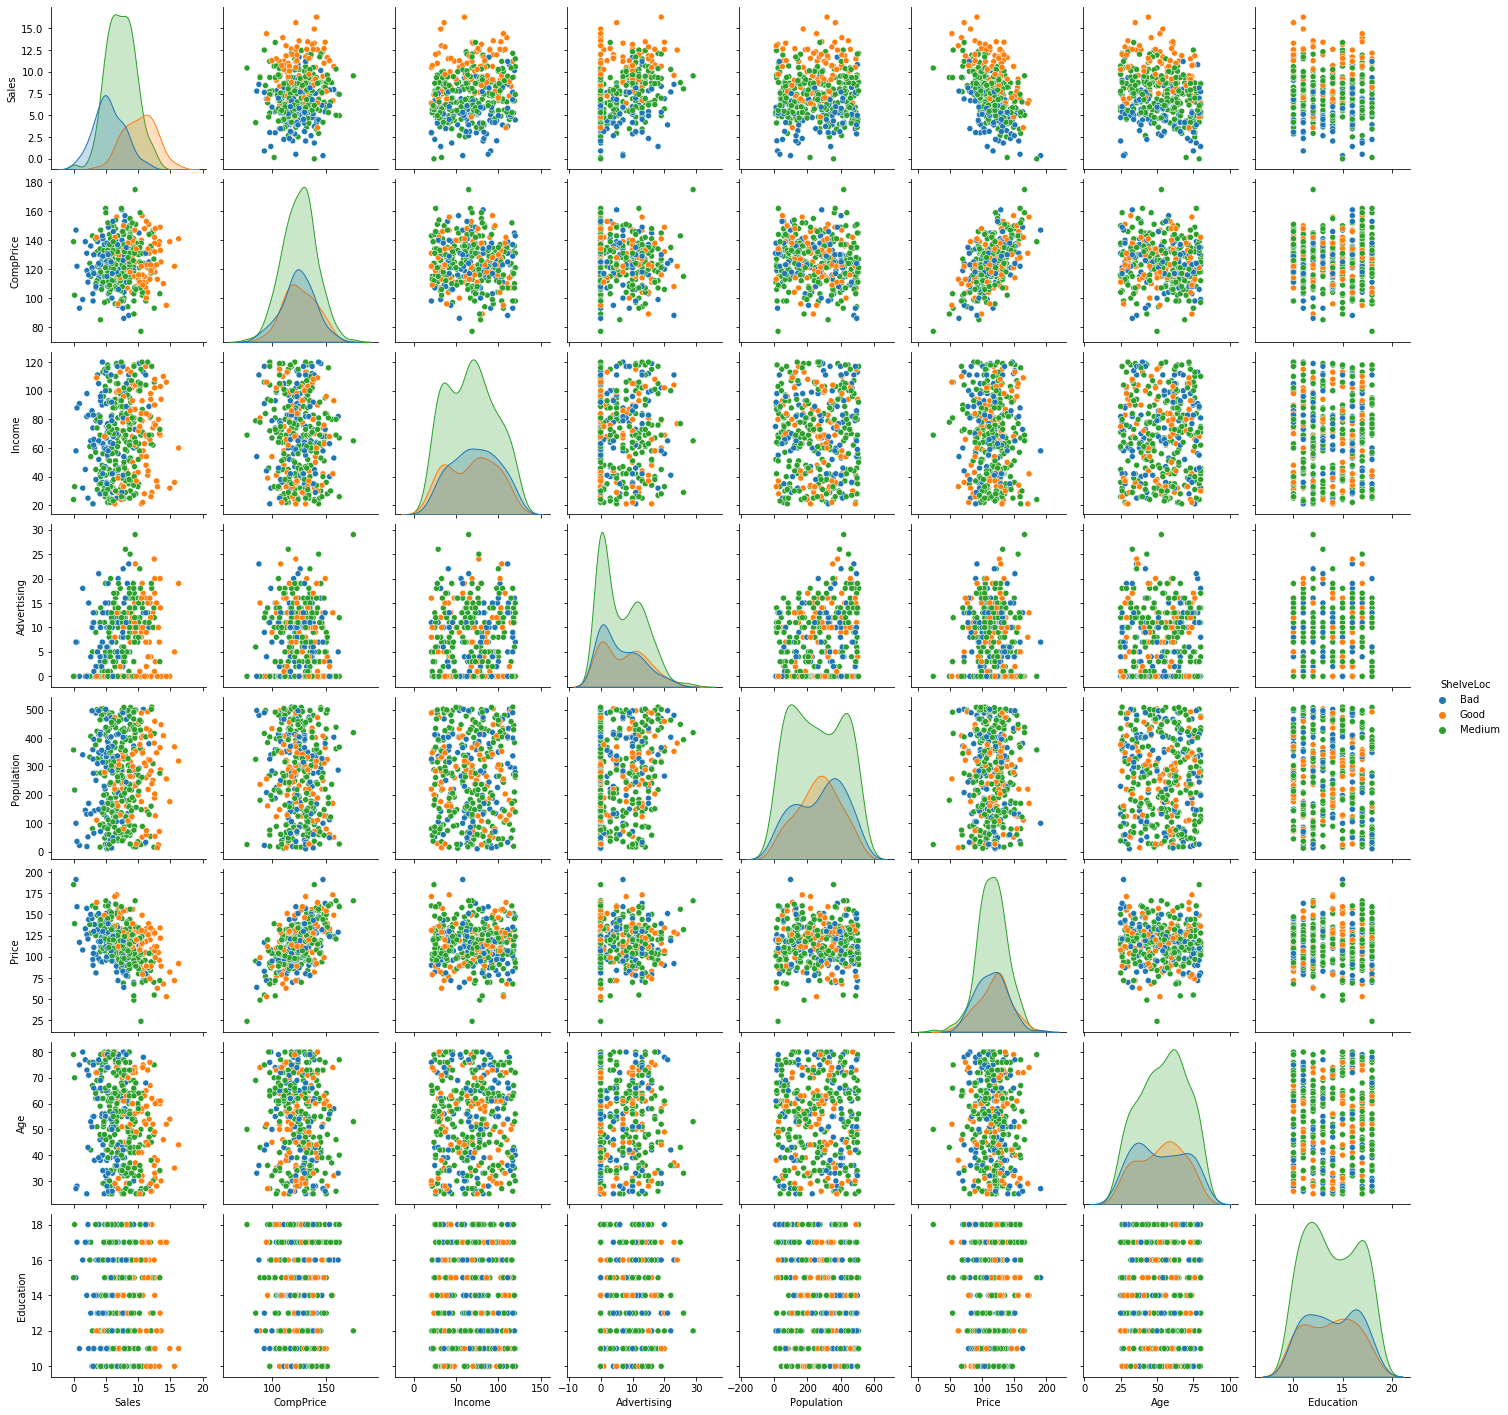

In [11]:
import seaborn as sns
sns.pairplot(data=company,hue="ShelveLoc")

In [13]:
company=pd.get_dummies(company,columns=['Urban','US'],drop_first=True)

In [14]:
print(company.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [15]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [16]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [17]:
company['ShelveLoc']=company['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
print(company.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [18]:
x=company.iloc[:,0:6]
y=company['ShelveLoc']

In [19]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [20]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [21]:
company['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [22]:
company.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [23]:
colnames=list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)


In [27]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
from sklearn import tree

[Text(167.4, 190.26, 'X[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]'),
 Text(83.7, 135.9, 'X[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]'),
 Text(41.85, 81.53999999999999, 'X[4] <= 349.5\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]'),
 Text(188.32500000000002, 27.180

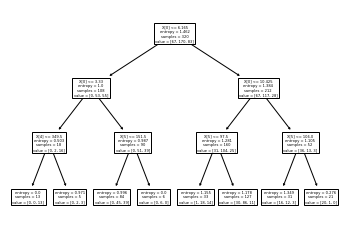

In [29]:
tree.plot_tree(model)

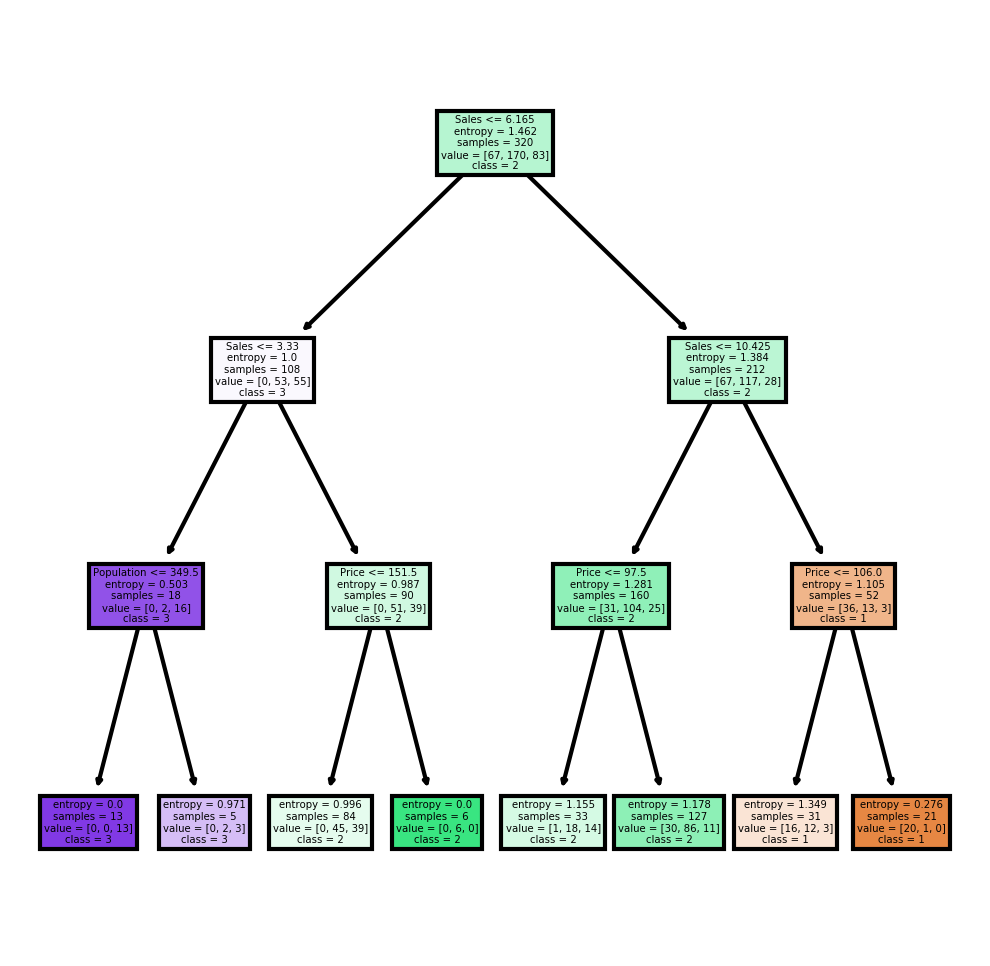

In [33]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1','2','3']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [34]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

2    63
1    13
3     4
dtype: int64

In [35]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [36]:
pd.crosstab(y_test,preds)

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [37]:
np.mean(preds==y_test)

0.625

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [40]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
array=company.values
x=array[0,3]
y=array[3]

In [62]:
x_full_train,x_full_test,y_full_train,y_full_test=train_test_split(x,y,test_size=0.33,random_state=42,stratify=y)


TypeError: Singleton array 11.0 cannot be considered a valid collection.

In [52]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
model.score(x_test,y_test)

-0.1731160896130346